Complete the exercises below For **Assignment #4**.

Use **Markdown** cells for the non-code answers.

In this assignment we will work with the data underlying the *FiveThirtyEight* article ["Higher Rates Of Hate Crimes Are Tied To Income Inequality"](https://fivethirtyeight.com/features/higher-rates-of-hate-crimes-are-tied-to-income-inequality/).

Load the `tidymodels`, `readr`, and `moderndive` packages in the cell below.

In [13]:
library('tidymodels')
library('readr')
library('moderndive')


We can read the data from a **CSV file** at the following URL: [http://bit.ly/2ItxYg3](http://bit.ly/2ItxYg3).

Use the `read_csv` function to read the data into our R session. Call the new table `hate_crimes`.

In [14]:
hate_crimes <- read.csv("http://bit.ly/2ItxYg3")
head(hate_crimes)




,state,median_house_inc,share_pop_metro,hs,hate_crimes,trump_support,unemployment,urbanization,income
,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<int>
1,New Mexico,low,0.69,83,0.295,low,high,low,46686
2,Maine,low,0.54,90,0.616,low,low,low,51710
3,New York,low,0.94,85,0.351,low,low,high,54310
4,Illinois,low,0.90,86,0.195,low,high,high,54916
5,Delaware,high,0.90,87,0.323,low,low,high,57522
6,Rhode Island,high,1.00,85,0.095,low,high,high,58633


In [15]:
glimpse(hate_crimes)

Rows: 51
Columns: 9
$ state            <chr> "New Mexico", "Maine", "New York", "Illinois", "Delaw…
$ median_house_inc <chr> "low", "low", "low", "low", "high", "high", "high", "…
$ share_pop_metro  <dbl> 0.69, 0.54, 0.94, 0.90, 0.90, 1.00, 0.87, 0.86, 0.97,…
$ hs               <int> 83, 90, 85, 86, 87, 85, 89, 90, 81, 91, 89, 89, 87, 8…
$ hate_crimes      <dbl> 0.295, 0.616, 0.351, 0.195, 0.323, 0.095, 0.833, 0.67…
$ trump_support    <chr> "low", "low", "low", "low", "low", "low", "low", "low…
$ unemployment     <chr> "high", "low", "low", "high", "low", "high", "high", …
$ urbanization     <chr> "low", "low", "high", "high", "high", "high", "high",…
$ income           <int> 46686, 51710, 54310, 54916, 57522, 58633, 58875, 5906…


In [16]:
hate_crimes = hate_crimes |> drop_na()

In [17]:
glimpse(hate_crimes)

Rows: 45
Columns: 9
$ state            <chr> "New Mexico", "Maine", "New York", "Illinois", "Delaw…
$ median_house_inc <chr> "low", "low", "low", "low", "high", "high", "high", "…
$ share_pop_metro  <dbl> 0.69, 0.54, 0.94, 0.90, 0.90, 1.00, 0.87, 0.86, 0.97,…
$ hs               <int> 83, 90, 85, 86, 87, 85, 89, 90, 81, 91, 89, 89, 87, 8…
$ hate_crimes      <dbl> 0.295, 0.616, 0.351, 0.195, 0.323, 0.095, 0.833, 0.67…
$ trump_support    <chr> "low", "low", "low", "low", "low", "low", "low", "low…
$ unemployment     <chr> "high", "low", "low", "high", "low", "high", "high", …
$ urbanization     <chr> "low", "low", "high", "high", "high", "high", "high",…
$ income           <int> 46686, 51710, 54310, 54916, 57522, 58633, 58875, 5906…


Next, let’s add the high-school degree variable into the mix by creating a scatterplot showing:

- Income on the y-axis (this is the `income` variable)
- Percent of adults 25 or older with a high school degree on the x-axis (this is the `hs` variable)
- The points colored by level of urbanization in a region (this is the variable `urbanization`)


**In addition, add a line of best fit (regression line) for each level of the variable urbanization (one for “low”, one for “high”).**

*Add the regression lines to the plot using the `geom_parallel_slopes` function from the `moderndive` package. This function will draw the regression lines based on fitting a regression model with parallel slopes (i.e., with no interaction between `hs` and `urbanization`).*

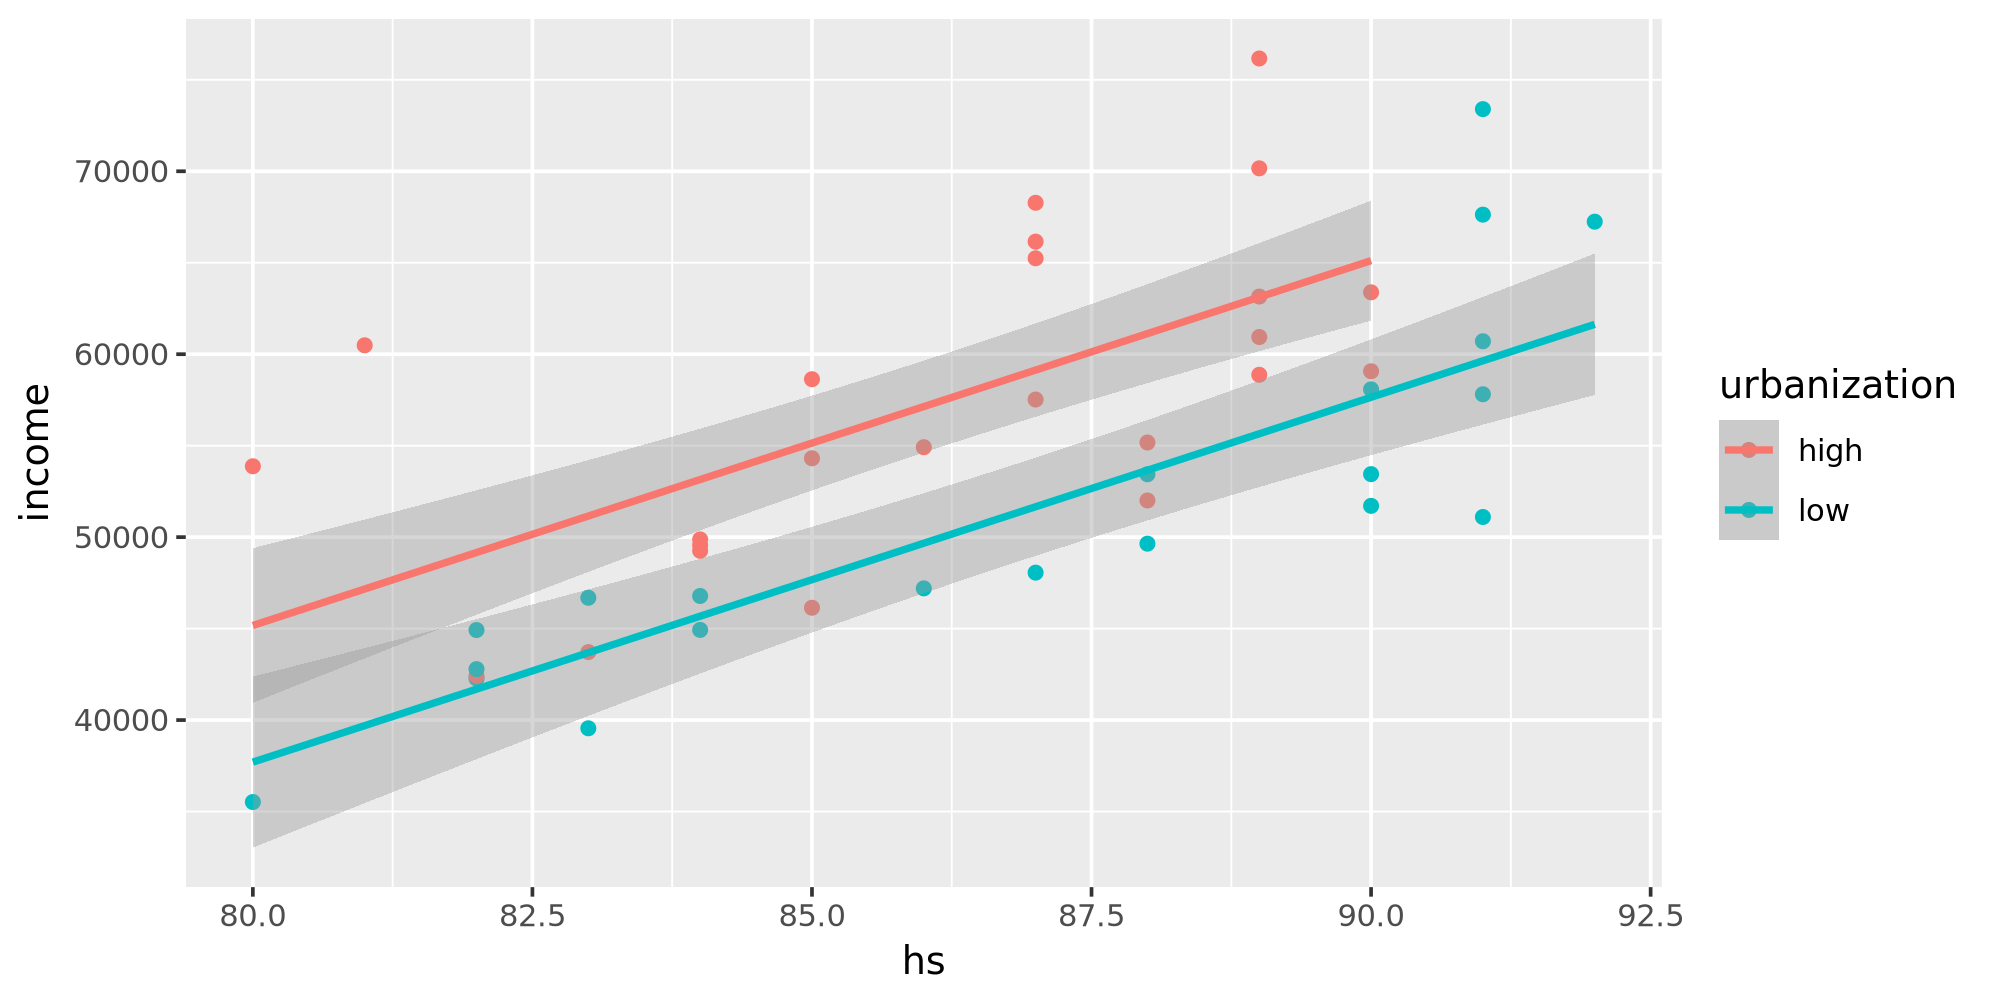

In [18]:
options(repr.plot.height = 4, repr.plot.width = 8)

ggplot(hate_crimes,aes(x = hs, y = income,color = urbanization)) +
    geom_point()+
    geom_parallel_slopes()

❓Which regression line (high urbanization or low urbanization) appears to have the larger intercept?

**Answer:**

Neither regression line truly intercepts, but if the hs percentages were lower, there maybe some overlap in the lower hs percentages.  Both regression lines are positively sloped.


Now let’s create a second scatterplot using the same variables, but this time draw the regression lines using `geom_smooth(method = "lm")`, which will allow for separate, non-parallel slopes for each urbanization group. 

**Code you your scatter plot in the cell below.**

`geom_smooth()` using formula = 'y ~ x'


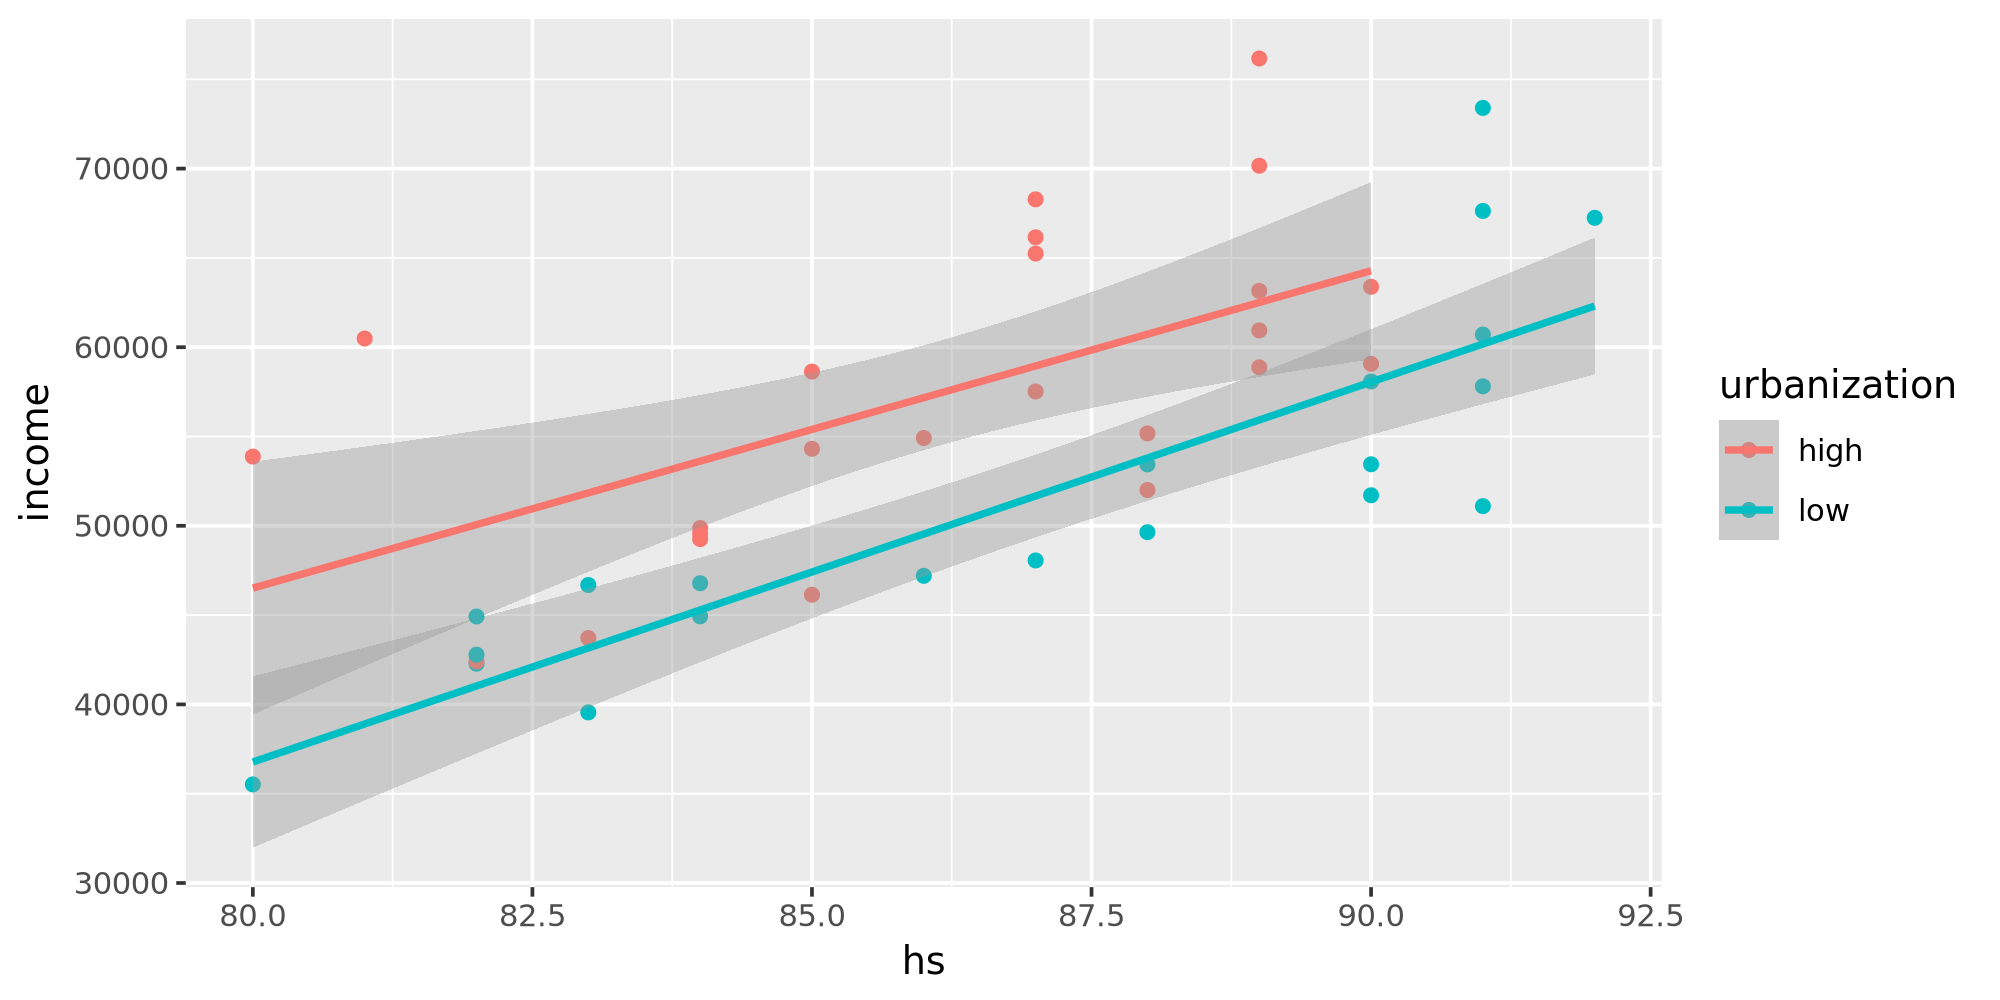

In [19]:
options(repr.plot.height = 4, repr.plot.width = 8)

ggplot(hate_crimes,aes(x = hs, y = income,color = urbanization)) +
    geom_point()+
    geom_smooth(method = "lm")#, se = FALSE)

❓Based on visually comparing the two models shown above, do you think it would be best to run a “parallel slopes” model (i.e. a model that estimates one shared slope for the two levels of urbanization), or a more complex “interaction model” (i.e. a model that estimates a separate slope for the two levels of urbanization)?

**Answer:**

Reviewing the data visually it looks like there is no intercept. When the slopes are parallel you want to use a parallel slope model.  It doesen't seem that urbanization, a thrid variable would cause a difference. 


Fit the following two regression models that examine the relationship between household `income` (as response variable), and high-school education (`hs`) and `urbanization` as explanatory variables:

1. A parallel slopes model (i.e., no interaction between `hs` and `urbanization`). ❗️Save the data recipe and model under the variables `ps_rec` and `ps_mod`, respectively. 
1. A non-parallel slopes model (i.e., allow `hs` and `urbanization` to interact in your model). ❗️Save the data recipe and model under the variable: `nps_rec` and `nps_mod`, respectively.

**Code you your models in the cell below.**

In [20]:
# parallel slopes model

ps_rec = recipe(income ~ hs + urbanization, data = hate_crimes) |> 
    step_naomit(everything()) |>   # drop na
    step_dummy(urbanization) |>    # dummy encode the urbanization variable
    prep()                         # run the recipe on the training data provided

mod = linear_reg() |> set_engine('lm')

ps_mod = mod |> fit(income ~ ., juice(ps_rec))

ps_mod

parsnip model object


Call:
stats::lm(formula = income ~ ., data = data)

Coefficients:
     (Intercept)                hs  urbanization_low  
         -114372              1994             -7469  


In [21]:
# non-parallel slopes model

nps_rec = recipe(income ~ hs + urbanization, data = hate_crimes) |> 
    step_naomit(everything()) |>   # drop na
    step_dummy(urbanization) |>    # dummy encode the urbanization variable
    step_interact(~ starts_with("urbanization"):hs) |>
    prep()                         # run the recipe on the training data provided

mod = linear_reg() |> set_engine('lm')

nps_mod = mod |> fit(income ~ ., juice(nps_rec))

nps_mod



parsnip model object


Call:
stats::lm(formula = income ~ ., data = data)

Coefficients:
          (Intercept)                     hs       urbanization_low  
             -95647.4                 1777.0               -37773.9  
urbanization_low_x_hs  
                350.5  


The following code creates a table of your model predictions over the training data. Calculate the [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination) (R<sup>2</sup>) for each model:

```r
rbind(
    augment(ps_mod, juice(ps_rec)) |> select(income, .pred, .resid) |> mutate(model = "parallel_slopes"),
    augment(nps_mod, juice(nps_rec)) |> select(income, .pred, .resid) |> mutate(model = "interaction")
)
```

1. Group rows by the `model` variable (use the `group_by` function).
1. Calculate the variance of income over the variance of your predictions for each model using the "grouped" data from the step above (use `summarize(r_squared = var(.pred) / var(income))`).

In [24]:
rbind(
    augment(ps_mod, juice(ps_rec)) |> select(income, .pred, .resid) |> mutate(model = 'ps_mod'),
    augment(nps_mod, juice(nps_rec)) |> select(income, .pred, .resid) |> mutate(model = 'nps_mod')
) |> group_by(model)|> summarize(r_squared = var(.pred) / var(income))

model,r_squared
<chr>,<dbl>
nps_mod,0.6068800
ps_mod,0.6032128


🎶 Note: you can also use the `glance` function with a model as input to find the coefficient of determination.

In [25]:
glance(ps_mod)
glance(nps_mod)

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.6032128,0.5843182,6095.036,31.9251,3.712875e-09,2,-454.4852,916.9705,924.1971,1560277443,42,45


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.60688,0.5781151,6140.345,21.09795,2.00388e-08,3,-454.2763,918.5527,927.586,1545857222,41,45


❓Compare the adjusted proportion of variance accounted for in each model. Based on this comparison, which model do you prefer? Why? 

**Answer:**

Both models have similiar R2; parallel_slopes - 0.603 and interaction - 0.607.  We would want to use the simplist model, i.e. parallel slopes as the urbanization does not seem to have any interaction on the income or hs

❓Using your preferred model, based on your regression model parameters (and the data visualizations), is `income` greater in states that have lower or higher levels of `urbanization`? By how much?

**Hint:** use the `tidy` function with your model as input to access the parameters in a nice table.

**Answer:**

The income decreases by $-7,469.40 in lower levels of urbanization

In [26]:
tidy(ps_mod)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-114372.274,23560.4029,-4.854428,1.705441e-05
hs,1994.303,273.0468,7.303889,5.360071e-09
urbanization_low,-7469.399,1833.8327,-4.073108,2.010890e-04


❓For every one percentage point increase of high-school educated adults in a state (`hs` variable), what is the associated average increase in `income`?

**Answer:**

For every percentage point increase in high-school education, the average increase in income is $1,994.30

